Q1. You are working on a machine learning project where you have a dataset containing numerical and
categorical features. You have identified that some of the features are highly correlated and there are
missing values in some of the columns. You want to build a pipeline that automates the feature
engineering process and handles the missing values.

Design a pipeline that includes the following steps:
- Use an automated feature selection method to identify the important features in the datasetC
- Create a numerical pipeline that includes the following steps"
- Impute the missing values in the numerical columns using the mean of the column valuesC
- Scale the numerical columns using standardisationC
- Create a categorical pipeline that includes the following steps"
- Impute the missing values in the categorical columns using the most frequent value of the columnC
- One-hot encode the categorical columnsC
- Combine the numerical and categorical pipelines using a ColumnTransformerC
- Use a Random Forest Classifier to build the final modelC
- Evaluate the accuracy of the model on the test dataset.

Note: Your solution should include code snippets for each step of the pipeline, and a brief explanation of each step. You should also provide an interpretation of the results and suggest possible improvements for the pipeline.

In [1]:
import pandas as pd
df = pd.read_csv('/content/HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.shape

(1470, 35)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
X=df.drop(labels=['Attrition'],axis=1)
y=df[['Attrition']]

In [6]:
y.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [7]:
y_replace={'Yes':1,'No':0}
y=y.replace(y_replace)
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [8]:
cat_cols=list(X.select_dtypes(include=object).columns)
num_cols=list(X.select_dtypes(exclude=object).columns)

In [9]:
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
from sklearn.feature_selection import SelectKBest,f_classif
X_num=X[num_cols]
k_best_numerical=SelectKBest(f_classif,k=10)
k_best_numerical.fit_transform(X_num,y)
selected_num_features=list(X_num.columns[k_best_numerical.get_support()])
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [13]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import OrdinalEncoder
X_col=X[cat_cols]
oe=OrdinalEncoder()
X_cat_encoded=pd.DataFrame(oe.fit_transform(X_col),columns=oe.get_feature_names_out())
k_best_categorical=SelectKBest(chi2,k=5)
k_best_categorical.fit_transform(X_cat_encoded,y)
selected_cat_features=list(X_cat_encoded.columns[k_best_categorical.get_support()])
selected_cat_features


['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [14]:
selected_features= selected_num_features+selected_cat_features
selected_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [15]:
X_selected=X[selected_features]
X_selected.shape

(1470, 15)

Feature Selection is completed

In [16]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_selected,y,test_size=0.2,random_state=42,stratify=y)
Xtrain.shape

(1176, 15)

In [17]:
Xtest.shape

(294, 15)

Creating numeric and categorical pipeline

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
         ('onehotencoder', OneHotEncoder()),
        ('scaler', StandardScaler(with_mean=False))
    ]
)

In [20]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,selected_num_features),
    ('cat_pipeline',cat_pipeline, selected_cat_features)
])

In [21]:
Xtrain_transformed=pd.DataFrame(preprocessor.fit_transform(Xtrain),columns=preprocessor.get_feature_names_out())
Xtest_transformed=pd.DataFrame(preprocessor.transform(Xtest),columns=preprocessor.get_feature_names_out())

In [23]:
Xtrain_transformed.head()

,num_pipeline__Age,num_pipeline__JobInvolvement,num_pipeline__JobLevel,num_pipeline__JobSatisfaction,num_pipeline__MonthlyIncome,num_pipeline__StockOptionLevel,num_pipeline__TotalWorkingYears,num_pipeline__YearsAtCompany,num_pipeline__YearsInCurrentRole,num_pipeline__YearsWithCurrManager,...,cat_pipeline__JobRole_Manufacturing Director,cat_pipeline__JobRole_Research Director,cat_pipeline__JobRole_Research Scientist,cat_pipeline__JobRole_Sales Executive,cat_pipeline__JobRole_Sales Representative,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Single,cat_pipeline__OverTime_No,cat_pipeline__OverTime_Yes
0,1.090194,1.795282,1.762189,-0.647997,2.026752,2.613100,2.261482,-0.665706,-0.625365,-0.616406,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,2.205793,0.000000
1,-1.634828,0.373564,-0.986265,1.153526,-0.864408,0.247430,-1.072675,-0.830071,-0.905635,-0.897047,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
2,0.981193,0.373564,1.762189,0.252765,2.347706,0.247430,1.492061,0.813578,1.336527,1.348076,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
3,-1.307825,0.373564,-0.986265,0.252765,-0.956202,-0.935405,-0.559727,-0.008246,-0.064824,0.506155,...,0.0,0.0,0.0,0.0,4.544641,0.000000,2.006697,0.0,2.205793,0.000000
4,0.654191,0.373564,-0.070114,0.252765,-0.185956,0.247430,-0.175017,0.156119,0.775986,0.786795,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,0.000000,2.205793


In [24]:
from sklearn.ensemble import RandomForestClassifier

models={
    'Random Forest': RandomForestClassifier()
}

from sklearn.metrics import accuracy_score

def evaluate_model(Xtrain,ytrain,Xtest,ytest,models):

  report={ }

  for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(Xtrain,ytrain)
    ypred=model.predict(Xtest)
    test_model_score=accuracy_score(ytest,ypred)
    report[list(models.keys())[i]]=test_model_score
  return report

In [25]:
evaluate_model(Xtrain_transformed,ytrain,Xtest_transformed,ytest,models)

{'Random Forest': 0.8333333333333334}

In [26]:
params = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=params,
                          cv=skf,
                          n_iter=50,
                          scoring='accuracy',
                          verbose=3)

In [28]:
rscv.fit(Xtrain_transformed,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.873 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.843 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.872 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.864 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.843 total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.881 total time=   0.9s
[CV 2/5] END max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.851 total time=   0.9s
[CV 3/5] END max_depth=9, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.868 total time=   0.9s
[CV 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [29]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 8}

In [30]:
rscv.best_score_

0.8673386224305807

In [31]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=5)

In [32]:
ypred_test = best_rfc.predict(Xtest_transformed)
ypred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

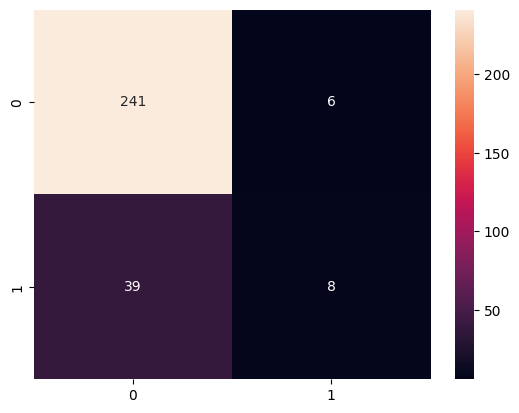

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred_test)
print(f'Accuracy on testing data is {acc:.4f}')

Accuracy on testing data is 0.8469


- Above model has accuracy of 0.8469 on testing data.
- However above data has imbalance data on target.
- To deal with imbalanced techniques such as SMOTE (Synthetic Minority Oversampling TEchnique).
- Feature selection can also be avoided in above data and performance should be checked with all features as well.

Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then
use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its
accuracy.

In [36]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)

In [38]:
X.shape

(150, 4)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.shape

(120, 4)

In [44]:
X_test.shape

(30, 4)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
rf_clf=RandomForestClassifier(random_state=42)
log_reg=LogisticRegression(random_state=42)

In [50]:
from sklearn.ensemble import VotingClassifier

voting_clf=VotingClassifier(estimators=[('rf',rf_clf),('log_reg',log_reg)], voting='hard')

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline=Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('voting_clf', voting_clf)
    ]
)

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('voting_clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('log_reg',
                                               LogisticRegression(random_state=42))]))])

In [53]:
y_pred = pipeline.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Voting Classifier on the Iris dataset: {accuracy:.2f}')

Accuracy of the Voting Classifier on the Iris dataset: 1.00
